In [1]:
# Importing dependencies needed
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
# Reading dataset and printing top 5 rows to get the feel of the data
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# To get the rows and columns present in the data set
data.shape

(119390, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.drop(['company','is_canceled','reservation_status','reservation_status_date','assigned_room_type','booking_changes',], axis=1, inplace=True) # Dropping null columns and unwanted fields
data = data.dropna(axis=0, subset=['country'])  # Dropping rows where country is null
data = data.fillna(0) # Replaced null values with 0 in children and agent fields
data.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

<AxesSubplot: xlabel='hotel', ylabel='count'>

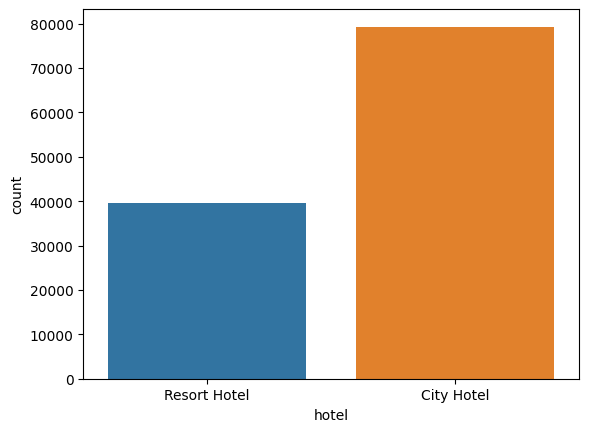

In [7]:
sns.countplot(x="hotel",data=data) # Classification classes are imbalanced

In [8]:
data['hotel'].value_counts()

City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

In [9]:
SampledData = data.groupby('hotel', group_keys=False).apply(lambda x: x.sample(35000)) #Balacing clases by stratified sampling (Majority Under sampling)

In [10]:
SampledData.shape

(70000, 26)

<AxesSubplot: xlabel='hotel', ylabel='count'>

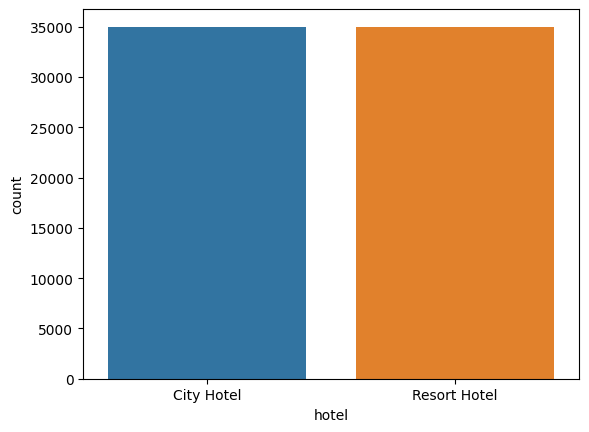

In [11]:
sns.countplot(x="hotel",data=SampledData)

In [12]:
SampledData.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
74299,City Hotel,330,2015,September,37,12,2,1,2,0.0,...,1,0,A,No Deposit,1.0,0,Transient-Party,62.80,0,0
115773,City Hotel,0,2017,July,28,10,1,0,1,0.0,...,0,0,A,No Deposit,9.0,0,Transient,140.00,0,2
113005,City Hotel,204,2017,May,22,28,2,2,2,0.0,...,0,0,A,No Deposit,9.0,0,Transient,133.65,0,1
87960,City Hotel,2,2016,April,18,28,0,1,1,0.0,...,0,0,A,No Deposit,0.0,0,Transient,121.00,0,0
45732,City Hotel,98,2015,November,48,23,1,2,1,0.0,...,0,0,A,No Deposit,37.0,0,Transient-Party,84.00,0,0


<AxesSubplot: xlabel='hotel', ylabel='count'>

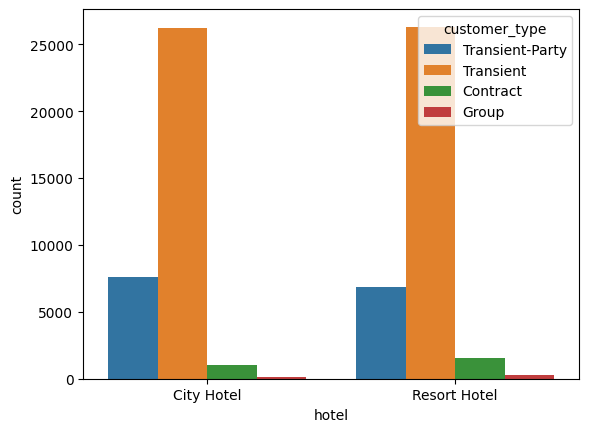

In [13]:
sns.countplot(x="hotel",hue="customer_type",data=SampledData)

In [14]:
SampledData.head(50)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
74299,City Hotel,330,2015,September,37,12,2,1,2,0.0,...,1,0,A,No Deposit,1.0,0,Transient-Party,62.80,0,0
115773,City Hotel,0,2017,July,28,10,1,0,1,0.0,...,0,0,A,No Deposit,9.0,0,Transient,140.00,0,2
113005,City Hotel,204,2017,May,22,28,2,2,2,0.0,...,0,0,A,No Deposit,9.0,0,Transient,133.65,0,1
87960,City Hotel,2,2016,April,18,28,0,1,1,0.0,...,0,0,A,No Deposit,0.0,0,Transient,121.00,0,0
45732,City Hotel,98,2015,November,48,23,1,2,1,0.0,...,0,0,A,No Deposit,37.0,0,Transient-Party,84.00,0,0
46989,City Hotel,18,2016,February,6,1,1,5,2,2.0,...,0,0,B,No Deposit,9.0,0,Transient-Party,77.88,0,0
98063,City Hotel,296,2016,September,39,21,0,4,2,0.0,...,0,0,A,No Deposit,26.0,0,Transient-Party,117.00,0,1
46348,City Hotel,1,2015,December,53,30,0,3,2,0.0,...,0,0,A,No Deposit,9.0,0,Transient,127.00,0,1
103961,City Hotel,0,2017,January,1,3,0,0,0,0.0,...,0,0,A,No Deposit,9.0,0,Transient,0.00,0,0
118157,City Hotel,79,2017,August,32,12,2,2,3,0.0,...,0,0,D,No Deposit,14.0,0,Transient,195.00,0,1


In [15]:
#Converting string values to categorical
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
SampledData.arrival_date_month = SampledData.arrival_date_month.map(d)   

rrt = pd.get_dummies(SampledData['reserved_room_type'])
dt = pd.get_dummies(SampledData['deposit_type'],drop_first=True)
ct = pd.get_dummies(SampledData['customer_type'])
ht = pd.get_dummies(SampledData['hotel'],drop_first=True)
cnty = pd.get_dummies(SampledData['country'])
ml = pd.get_dummies(SampledData['meal'])
ms = pd.get_dummies(SampledData['market_segment'])
dc = pd.get_dummies(SampledData['distribution_channel'])

SampledData = pd.concat([SampledData,rrt,dt,ct,ht,cnty,ml,ms,dc],axis=1)
SampledData = SampledData.drop(['reserved_room_type','deposit_type','customer_type','hotel','country','Undefined','meal','market_segment','distribution_channel'],axis=1)
SampledData.rename(columns={'Resort Hotel': 'hotel'}, inplace=True)

## Modeling

In [35]:
# y is the dependent variable or target variable while X is the independent variables
y = SampledData['hotel']
X = SampledData.drop("hotel",axis=1)
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',max_iter=3000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

C:\Users\inikh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.90     10614\n           1       0.90      0.90      0.90     10386\n\n    accuracy                           0.90     21000\n   macro avg       0.90      0.90      0.90     21000\nweighted avg       0.90      0.90      0.90     21000\n'

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[9537, 1077],
       [1000, 9386]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9010952380952381